In [12]:
import pandas as pd

In [13]:
df = pd.read_csv("sff2022 brands.csv")

In [14]:
df["url"] = df["url"].str.lower()

In [15]:
url_list = df["url"].tolist()

In [16]:
url_company_di = dict(zip(df["url"].tolist(),df["brand"].tolist()))

In [18]:
from spark_tools import *

from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl
#import seaborn as sns

import apollo
from apollo import OverrideConfiguration
from apollo import dataset
import apollo_artifacts
from apollo_artifacts import datasets

from core.pandas_display_util import set_no_pandas_truncation_options
apollo.OverrideConfiguration().apply()

#from helio_utils.spark import spark_to_pandas


In [19]:
combined_hgp_dimensions_scored_output_all_brands_202112 = 's3a://circleup-datascience/HGP/2022-02-15/combined_hgp_dimensions_scored_output_all_brands_202112/'
first_test_s3_link_from_historic = 's3a://circleup-datascience/HGP/2021-03-04/combined_hgp_dimensions_scored_output_202101'
df = spark.read.parquet("s3a://circleup-datascience/HGP/2022-02-15/combined_hgp_dimensions_scored_output_all_brands_202112/")

df_pdf = df.toPandas()


/usr/local/lib/python3.6/site-packages/pyarrow/pandas_compat.py:751: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels, = index.labels


In [35]:
df_pdf_filtered =  df_pdf[df_pdf['normalized_url'].isin(url_list)]
df_pdf_filtered ["sff2022 company name"] = df_pdf_filtered["normalized_url"].map(url_company_di)
df_pdf_filtered.insert(0, 'sff2022 company name', df_pdf_filtered.pop('sff2022 company name'))

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [36]:
df_pdf_filtered.to_csv("sff2022 hgp.csv")

In [37]:
df_pdf_filtered

,sff2022 company name,normalized_url,fct_date,score_date,parent_category,parent_category_hgp_score,overall_hgp_score,overall_feature_density,t12m_nielsen_sales,t12m_nielsen_sales_pct_growth,...,social_feature_density,social_score,parent_category_social_score,social_weight,web_feature_density,web_score,parent_category_web_score,web_weight,overall_confidence,reliability_bucket
998,Bona Furtuna LLC,bonafurtuna.com,2021-12,2021-12,Food,0.999451,0.999838,0.685315,4.116903e+04,NaN,...,0.387755,0.948596,0.935911,0.15,1.000,0.992347,0.991459,0.05,0.783031,high
1064,Bon AppeSweet Inc,bonappesweet.com,2021-12,2021-12,Food,0.462672,0.452053,0.055944,NaN,NaN,...,0.061224,0.552482,0.563609,0.15,0.125,0.280613,0.278154,0.05,0.015483,low
1560,Ford's Food Inc.,bonesuckin.com,2021-12,2021-12,Food,0.001220,0.000279,0.930070,4.059803e+06,-0.126845,...,0.795918,0.027520,0.027828,0.15,1.000,0.003282,0.003071,0.05,0.963267,high
1736,Bonifanti Srl,bonifanti.com,2021-12,2021-12,Food,0.991086,0.996851,0.363636,NaN,NaN,...,0.224490,0.870614,0.861001,0.15,0.775,0.196109,0.194470,0.05,0.169288,low
4311,Borgo de Medici USA Inc,borgodemedici.us,2021-12,2021-12,Food,0.996961,0.998803,0.629371,2.943636e+04,NaN,...,0.224490,0.947183,0.934567,0.15,0.675,0.988957,0.987383,0.05,0.840903,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464149,776 Deluxe Foods S.A.,776deluxe.com,2021-12,2021-12,Food,0.764366,0.779931,0.552448,6.871911e+03,-0.390137,...,0.367347,0.860003,0.850447,0.15,1.000,0.988501,0.987961,0.05,0.406577,medium_high
1468296,Abbott Blackstone,abbottblackstone.com,2021-12,2021-12,Food,0.731812,0.756565,0.188811,NaN,NaN,...,NaN,NaN,NaN,0.15,0.675,0.935101,0.932962,0.05,0.031973,low
1468839,Abdallah Candies,abdallahcandies.com,2021-12,2021-12,Food,0.017850,0.004881,0.811189,5.983542e+06,0.501350,...,0.714286,0.207244,0.241691,0.15,1.000,0.448580,0.448628,0.05,0.850954,high
1469914,American Beverage Marketers,abmcocktails.com,2021-12,2021-12,Other,0.784404,0.770152,0.370629,NaN,NaN,...,NaN,NaN,NaN,0.15,1.000,0.118345,0.118361,0.05,0.150000,low


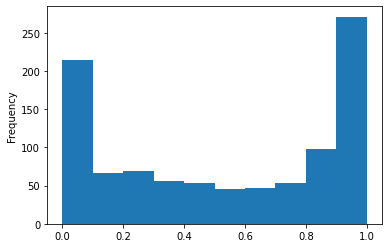

In [38]:
df_pdf_filtered["overall_hgp_score"].plot.hist()

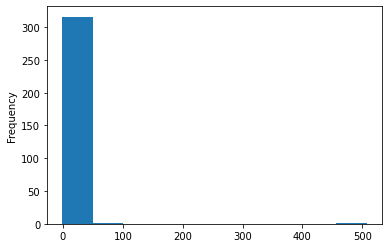

In [39]:
df_pdf_filtered["t12m_nielsen_sales_pct_growth"].plot.hist()

In [41]:
df_pdf_filtered.sort_values("t12m_nielsen_sales_pct_growth",ascending=False).head(20)

,sff2022 company name,normalized_url,fct_date,score_date,parent_category,parent_category_hgp_score,overall_hgp_score,overall_feature_density,t12m_nielsen_sales,t12m_nielsen_sales_pct_growth,...,social_feature_density,social_score,parent_category_social_score,social_weight,web_feature_density,web_score,parent_category_web_score,web_weight,overall_confidence,reliability_bucket
377333,Burke Brands LLC,donpablocoffee.com,2021-12,2021-12,Non-Alcoholic Beverages,0.988904,0.994159,0.958042,9.061024e+05,507.540633,...,0.918367,0.726115,0.710474,0.15,1.000,0.916852,0.918055,0.05,0.960423,high
39762,Good Food For Good Inc.,goodfoodforgood.ca,2021-12,2021-12,Food,0.998795,0.999608,0.972028,7.348093e+05,55.551301,...,0.918367,0.634804,0.633884,0.15,1.000,0.659130,0.641693,0.05,0.984421,high
112846,"FoodMatch, Inc.",foodmatch.com,2021-12,2021-12,Food,0.997589,0.999174,0.874126,9.338740e+06,20.880510,...,0.632653,0.818827,0.817162,0.15,1.000,0.483811,0.483531,0.05,0.944523,high
67080,Whoa Dough,whoadough.com,2021-12,2021-12,Food,0.993641,0.997130,0.874126,5.020165e+04,12.827421,...,0.897959,0.998039,0.996490,0.15,1.000,0.998539,0.998081,0.05,0.882303,high
754867,Noonas Ice Cream LLC,noonasicecream.com,2021-12,2021-12,Food,0.998167,0.999320,0.811189,2.587782e+04,7.557432,...,0.714286,0.978413,0.972450,0.15,1.000,0.987504,0.985855,0.05,0.850954,high
39864,GOOD GOOD Natural Sweetness LLC,goodgood.net,2021-12,2021-12,Food,0.999610,0.999887,0.657343,1.164501e+05,7.054126,...,NaN,NaN,NaN,0.15,1.000,0.979837,0.978524,0.05,0.850000,high
279347,Noshi LLC,noshiforkids.com,2021-12,2021-12,Food,0.993785,0.997660,0.706294,1.035299e+05,6.725616,...,0.408163,0.319008,0.348298,0.15,1.000,0.405965,0.394489,0.05,0.806238,high
1047788,Genuine Coconut,genuinecoconut.com,2021-12,2021-12,Other,0.999892,0.999834,0.734266,3.400109e+06,6.147205,...,0.489796,0.486489,0.483516,0.15,0.875,0.710618,0.694809,0.05,0.855562,high
1359346,Belle's Popcorn,bellespopcorn.com,2021-12,2021-12,Food,0.978793,0.992380,0.391608,1.320495e+06,5.559644,...,NaN,NaN,NaN,0.15,0.875,0.938962,0.930859,0.05,0.345020,medium_high
1026240,Dutch Cheese Makers Corp.,artikaas.com,2021-12,2021-12,Food,0.999401,0.999828,0.538462,1.095741e+06,4.213838,...,0.142857,0.883134,0.872377,0.15,0.450,0.911494,0.904613,0.05,0.829193,high
